<a href="https://colab.research.google.com/github/anirudhpnbb/traffic_sign_recognition/blob/master/traffic_signs_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Traffic signs recognition using convolutional neural networks.

# Importing the required libraries

In [ ]:
import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import cv2
import random
import pandas as pd
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Importing the data and understanding it

In [ ]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs

Cloning into 'german-traffic-signs'...
remote: Counting objects: 6, done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 6 (delta 0), reused 0 (delta 0)
Unpacking objects: 100% (6/6), done.


In [ ]:
# Reading the train data

data = pd.read_csv('german-traffic-signs/signnames.csv')

In [ ]:
data.head()

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)


In [ ]:
with open("german-traffic-signs/train.p", mode = "rb") as training:
  train = pickle.load(training)

with open("german-traffic-signs/test.p", mode = "rb") as testing:
  test = pickle.load(testing)

with open("german-traffic-signs/valid.p", mode = "rb") as validation:
  valid = pickle.load(validation)

In [ ]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [ ]:
X_train.shape

(34799, 32, 32, 3)

image label=34


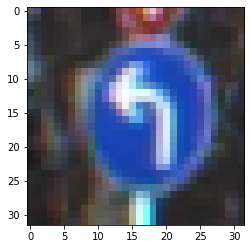

In [ ]:
index = np.random.randint(1, len(X_train))
plt.imshow(X_train[index])
print("image label={}".format(y_train[index]))

# Image Pre-processing

1. Converting to grayscale for the system to understand.
2. Histogram equalization to give a light to the images as some will be dim or dull
3. Normalization

In [ ]:
# Shuffling the data so that the model doesn't learn the order of the data

from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

In [ ]:
def preprocessing(img):
  # Converting to grayscale
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  # Applying histogram equalization
  img = cv2.equalizeHist(img)
  #Normalization
  img =img/255
  return img

# Plotting the processed images

In [ ]:
X_train_processed = np.array(list(map(preprocessing, X_train)))
X_validation_processed = np.array(list(map(preprocessing, X_validation)))
X_test_processed = np.array(list(map(preprocessing, X_test)))

In [ ]:
X_train_processed = X_train_processed.reshape(34799,32,32,1)
X_test_processed = X_test_processed.reshape(12630,32,32,1)
X_validation_processed = X_validation_processed.reshape(4410,32,32,1)

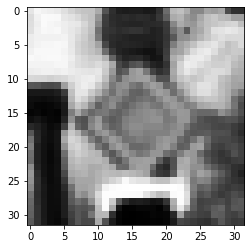

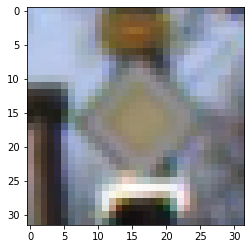

In [ ]:
i = random.randint(1,len(X_train))
plt.imshow(X_train_processed[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_train[i].squeeze())
plt.show()

# Building the model.

In [ ]:
model = Sequential()

# Adding the convulutional layer; filters, size of filters, input_shape, activation_function.
model.add(Conv2D(32, (5, 5), activation = 'relu', input_shape = (32, 32, 1))) # To extract features of the images. and the (5, 5) is the pixel length/ area,
                              #which the layer keeps iterating. The first 32 is the number of filters ad the input shape is 
                              # according to the shape of the data; where 32, 32 are the dimensions of the image and
                              # the 1 means the image is of grayscale.

# Pooling layer.
model.add(MaxPooling2D(pool_size=(2,2))) # 2, 2 actually reduces the size but maintains the same features that we already have.

# Dropout layer.
model.add(Dropout(0.25)) # Here 0.25 means we are avoiding 25% of the neurons to avoid overfitting of the data.

# Adding another convolutional layer.
model.add(Conv2D(64, (5, 5), activation = 'relu')) # We have increased the size of the feature extractiong from 32 to 64.

# Pooling layer again.
model.add(MaxPooling2D(pool_size=(2,2))) # 2, 2 actually reduces the size but maintains the same features that we already have.

# After the size has been squeezed and the features are saved;
# Flatten the image to 1-dimensional array. It is basically bringing the image from 2D to 1D.
model.add(Flatten())

# Adding a dense layer: amount of nodes, activation. It is nothing but our fully connected layer.
model.add(Dense(256, activation='relu'))

# Adding a dropout layer.
model.add(Dropout(0.50)) # Here 0.50 means we are avoiding 50% of the neurons to avoid overfitting of the data.

# Defining the output layer of our network. As we are classifying 43 images/ traffic signs, I would want 43 outputs.
# So, the output layer will have 43 neurons.
model.add(Dense(43, activation='softmax'))

# Getting the summary.
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               4

In [ ]:
# Compiling our model.
model.compile(Adam(lr=0.0001), loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
# Fitting the training data to the model.

history = model.fit(X_train_processed,
                    y_train,
                    batch_size = 500, # Batch size is the number of images we will be feeding at once to the model.
                    epochs = 50,
                    verbose = 1, # Verbose is about the interaction/ progress bar.
                    validation_data = (X_validation_processed, y_validation))  

Epoch 1/50
70/70 [==============================] - 2s 31ms/step - loss: 3.5795 - accuracy: 0.0655 - val_loss: 3.4597 - val_accuracy: 0.1902
Epoch 2/50
70/70 [==============================] - 2s 25ms/step - loss: 3.2178 - accuracy: 0.1904 - val_loss: 2.9275 - val_accuracy: 0.3268
Epoch 3/50
70/70 [==============================] - 2s 25ms/step - loss: 2.5894 - accuracy: 0.3503 - val_loss: 2.2867 - val_accuracy: 0.4508
Epoch 4/50
70/70 [==============================] - 2s 25ms/step - loss: 2.1170 - accuracy: 0.4368 - val_loss: 1.8439 - val_accuracy: 0.5295
Epoch 5/50
70/70 [==============================] - 2s 25ms/step - loss: 1.7923 - accuracy: 0.5023 - val_loss: 1.5437 - val_accuracy: 0.5735
Epoch 6/50
70/70 [==============================] - 2s 25ms/step - loss: 1.5675 - accuracy: 0.5493 - val_loss: 1.3343 - val_accuracy: 0.6458
Epoch 7/50
70/70 [==============================] - 2s 25ms/step - loss: 1.3803 - accuracy: 0.5971 - val_loss: 1.1577 - val_accuracy: 0.6791
Epoch 8/50
70

# Testing and evaluating the model.

In [ ]:
score = model.evaluate(X_test_processed, y_test)
print("Test accuracy: {}".format(score[1]))

395/395 [==============================] - 1s 3ms/step - loss: 0.3165 - accuracy: 0.9144
Test accuracy: 0.9144101142883301


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

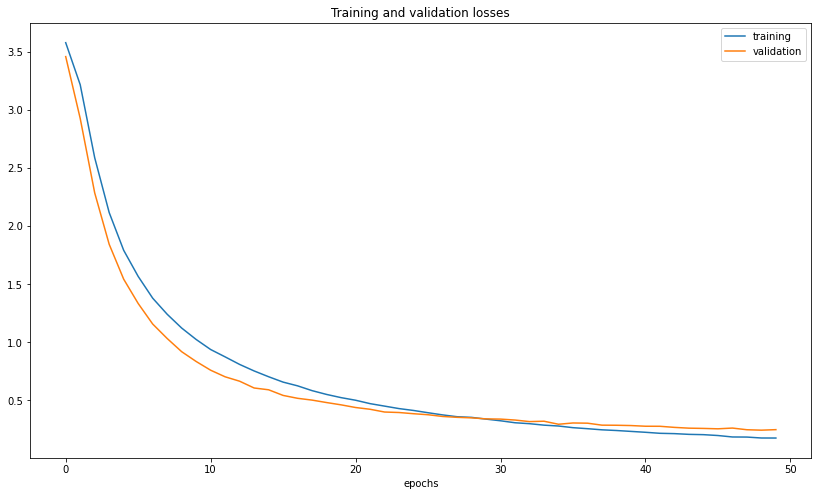

In [ ]:
plt.figure(figsize = (14, 8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Training and validation losses')
plt.xlabel('epochs')
plt.show()

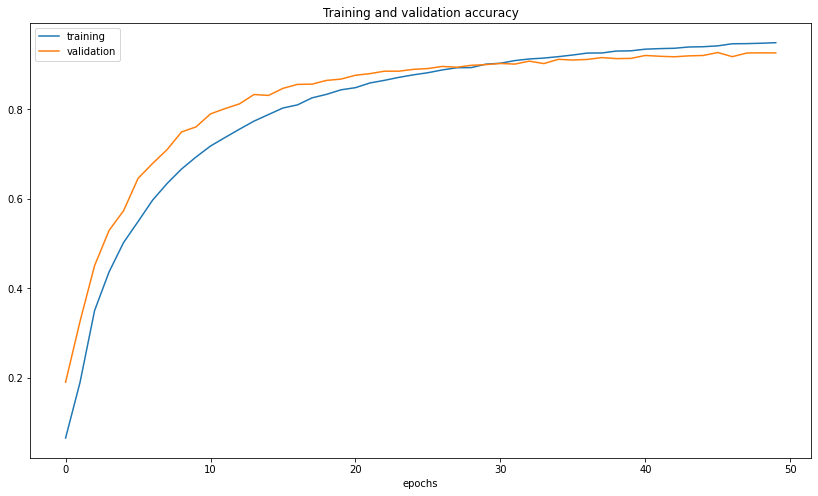

In [ ]:
plt.figure(figsize = (14, 8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.title('Training and validation accuracy')
plt.xlabel('epochs')
plt.show()

In [ ]:
prediction = model.predict_classes(X_test_processed)
y_true_label = y_test

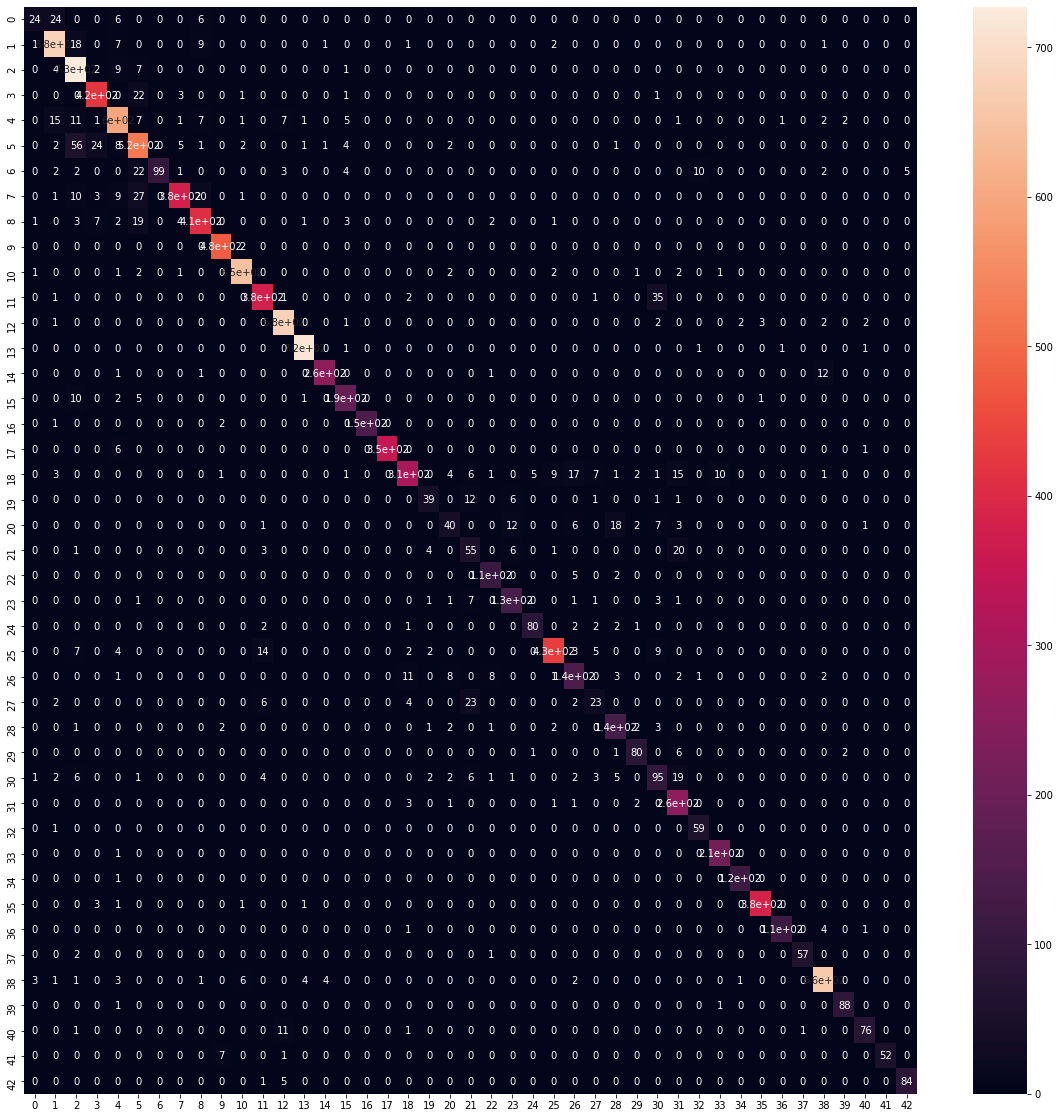

In [ ]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_true_label, prediction)
plt.figure(figsize = (20,20))
sns.heatmap(matrix, annot = True)
plt.show()

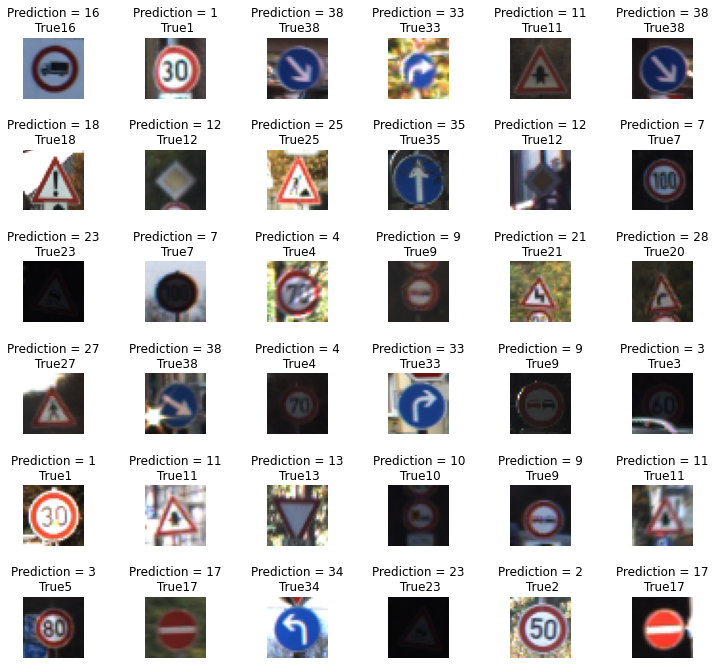

In [ ]:
l = 6
w = 6
fig, axes = plt.subplots(l, w, figsize = (12, 12))
axes = axes.ravel() # Flattens the matrix.
for i in range(0, l*w):
  axes[i].imshow(X_test[i])
  axes[i].set_title("Prediction = {}\n True{}".format(prediction[i], y_true_label[i]))
  axes[i].axis('off')
plt.subplots_adjust(wspace=1)
plt.show()

In [ ]:
model.save('traffic_signs_recognition_model.h5') # Creates the htf5 model.